In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import math
import sys

In [3]:
# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

#Классификация, https://www.kaggle.com/vicsuperman/prediction-of-music-genre?select=music_genre.csv

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/music_genre.csv")
data.head()

instance_id           artist_name  ... valence  music_genre
0      32894.0              Röyksopp  ...   0.759   Electronic
1      46652.0  Thievery Corporation  ...   0.531   Electronic
2      30097.0        Dillon Francis  ...   0.333   Electronic
3      62177.0              Dubloadz  ...   0.270   Electronic
4      24907.0           What So Not  ...   0.323   Electronic

[5 rows x 18 columns]

In [6]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [7]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
data = data.drop('instance_id', axis = 1)

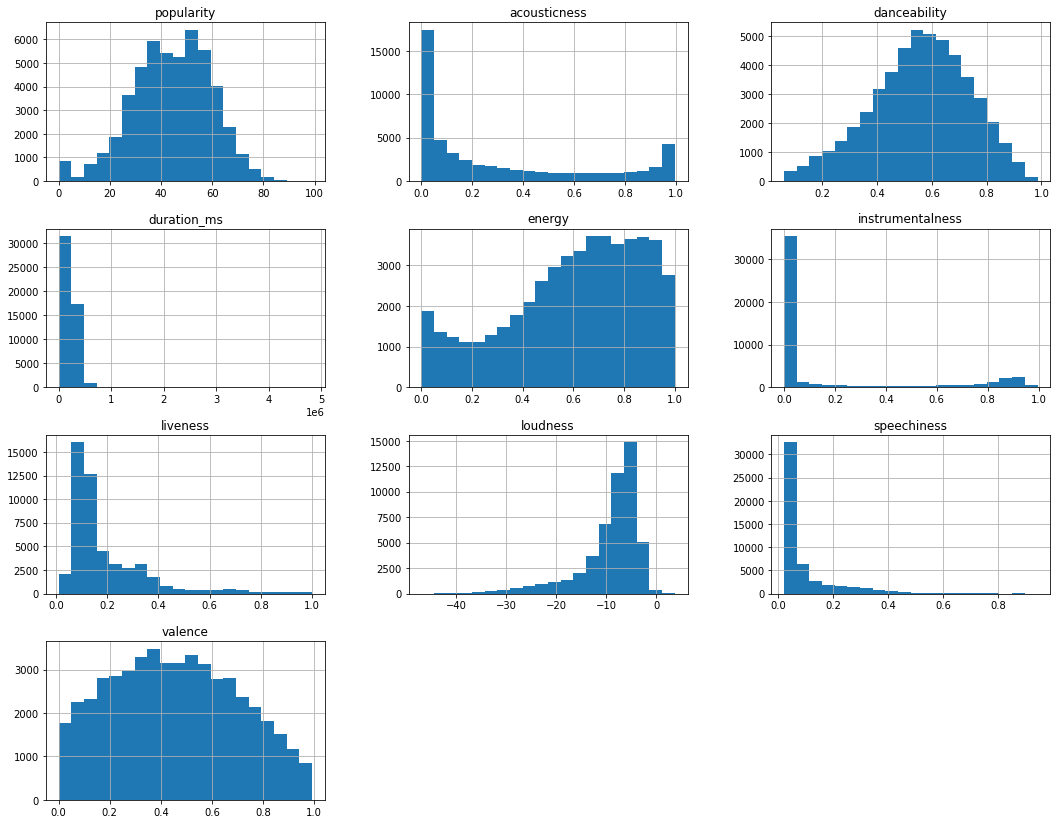

In [5]:
data[data.columns].hist(figsize =  (18,14.3), bins = 20);

In [6]:
data[data['tempo']=='?'] = 0
data['tempo'] = data['tempo'].astype('float64')

In [7]:
num = list(data.dtypes[data.dtypes == "float64"].index)
int_list = list(data.dtypes[data.dtypes == "int64"].index)
num = num + int_list
print(len(num))

11


In [8]:
data = data.fillna(0)

In [9]:
d = pd.unique(data["music_genre"])

In [10]:
k = 1
for i in d:
  data.loc[(data["music_genre"] == i), 'music_genre'] = k
  k += 1
pd.unique(data["music_genre"])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

In [11]:
data["music_genre"] = pd.to_numeric(data["music_genre"])
pd.unique(data["music_genre"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
categorical = list(data.dtypes[data.dtypes == "object"].index)
print(len(categorical))

5


In [16]:
import pandas

In [18]:
kl = pandas.get_dummies(data['music_genre'])

In [19]:
data.join(kl)

artist_name                track_name  popularity  ...  9  10  11
0                  Röyksopp      Röyksopp's Night Out        27.0  ...  0   0   0
1      Thievery Corporation          The Shining Path        31.0  ...  0   0   0
2            Dillon Francis                 Hurricane        28.0  ...  0   0   0
3                  Dubloadz                     Nitro        34.0  ...  0   0   0
4               What So Not          Divide & Conquer        32.0  ...  0   0   0
...                     ...                       ...         ...  ... ..  ..  ..
50000                 BEXEY                  GO GETTA        59.0  ...  0   0   1
50001             Roy Woods       Drama (feat. Drake)        72.0  ...  0   0   1
50002                Berner  Lovin' Me (feat. Smiggz)        51.0  ...  0   0   1
50003             The-Dream         Shawty Is Da Shit        65.0  ...  0   0   1
50004     Naughty By Nature            Hip Hop Hooray        67.0  ...  0   0   1

[50005 rows x 28 columns]

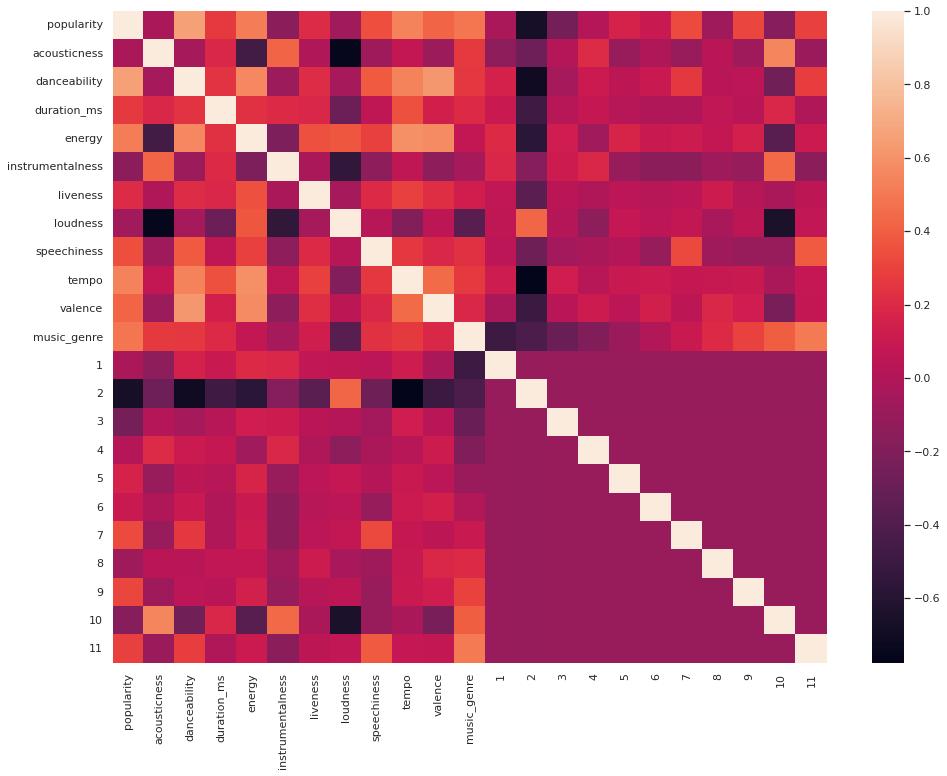

In [20]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap((data[[*num,"music_genre"]].join(kl)).corr());

нормальная корреляция видна только у energy и loudness, выкинем energy

In [21]:
data = data.drop('energy',axis = 1)
num.remove('energy')

In [22]:
def get_one_hot(data):
  for column in categorical:
      tempdf = pd.get_dummies(data[column], prefix=column)
      data = pd.merge(
          left=data,
          right=tempdf,
          left_index=True,
          right_index=True,
      )
  data = data.drop(categorical, axis=1)
  return data

In [23]:
data = data.drop('track_name',axis = 1)
categorical.remove('track_name')

In [24]:
data = data.drop('artist_name',axis = 1)
categorical.remove('artist_name')

In [25]:
data = data.drop('obtained_date',axis = 1)
categorical.remove('obtained_date')

In [26]:
df = get_one_hot(data)

In [27]:
print(data.shape)
print(df.shape)

(50005, 13)
(50005, 27)


In [24]:
df.head()

popularity  acousticness  danceability  ...  mode_0  mode_Major  mode_Minor
0        27.0       0.00468         0.652  ...       0           0           1
1        31.0       0.01270         0.622  ...       0           0           1
2        28.0       0.00306         0.620  ...       0           1           0
3        34.0       0.02540         0.774  ...       0           1           0
4        32.0       0.00465         0.638  ...       0           1           0

[5 rows x 27 columns]

In [28]:
categorical

['key', 'mode']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


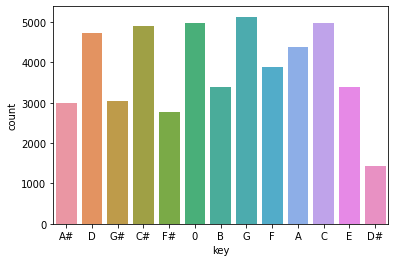

In [26]:
sns.countplot(data['key']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


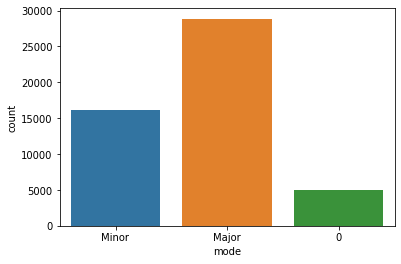

In [40]:
sns.countplot(data['mode']);

In [41]:
data[num].describe()

popularity  acousticness  ...   music_genre         tempo
count  50005.000000  50005.000000  ...  50005.000000  50005.000000
mean      39.850715      0.276031  ...      5.679572    107.994846
std       19.840797      0.336699  ...      3.546137     46.225017
min        0.000000      0.000000  ...      0.000000      0.000000
25%       29.000000      0.006990  ...      2.000000     87.982000
50%       42.000000      0.102000  ...      6.000000    113.762000
75%       54.000000      0.484000  ...      9.000000    139.465000
max       99.000000      0.996000  ...     11.000000    220.276000

[8 rows x 11 columns]

In [ ]:
dop = num+['music_genre']

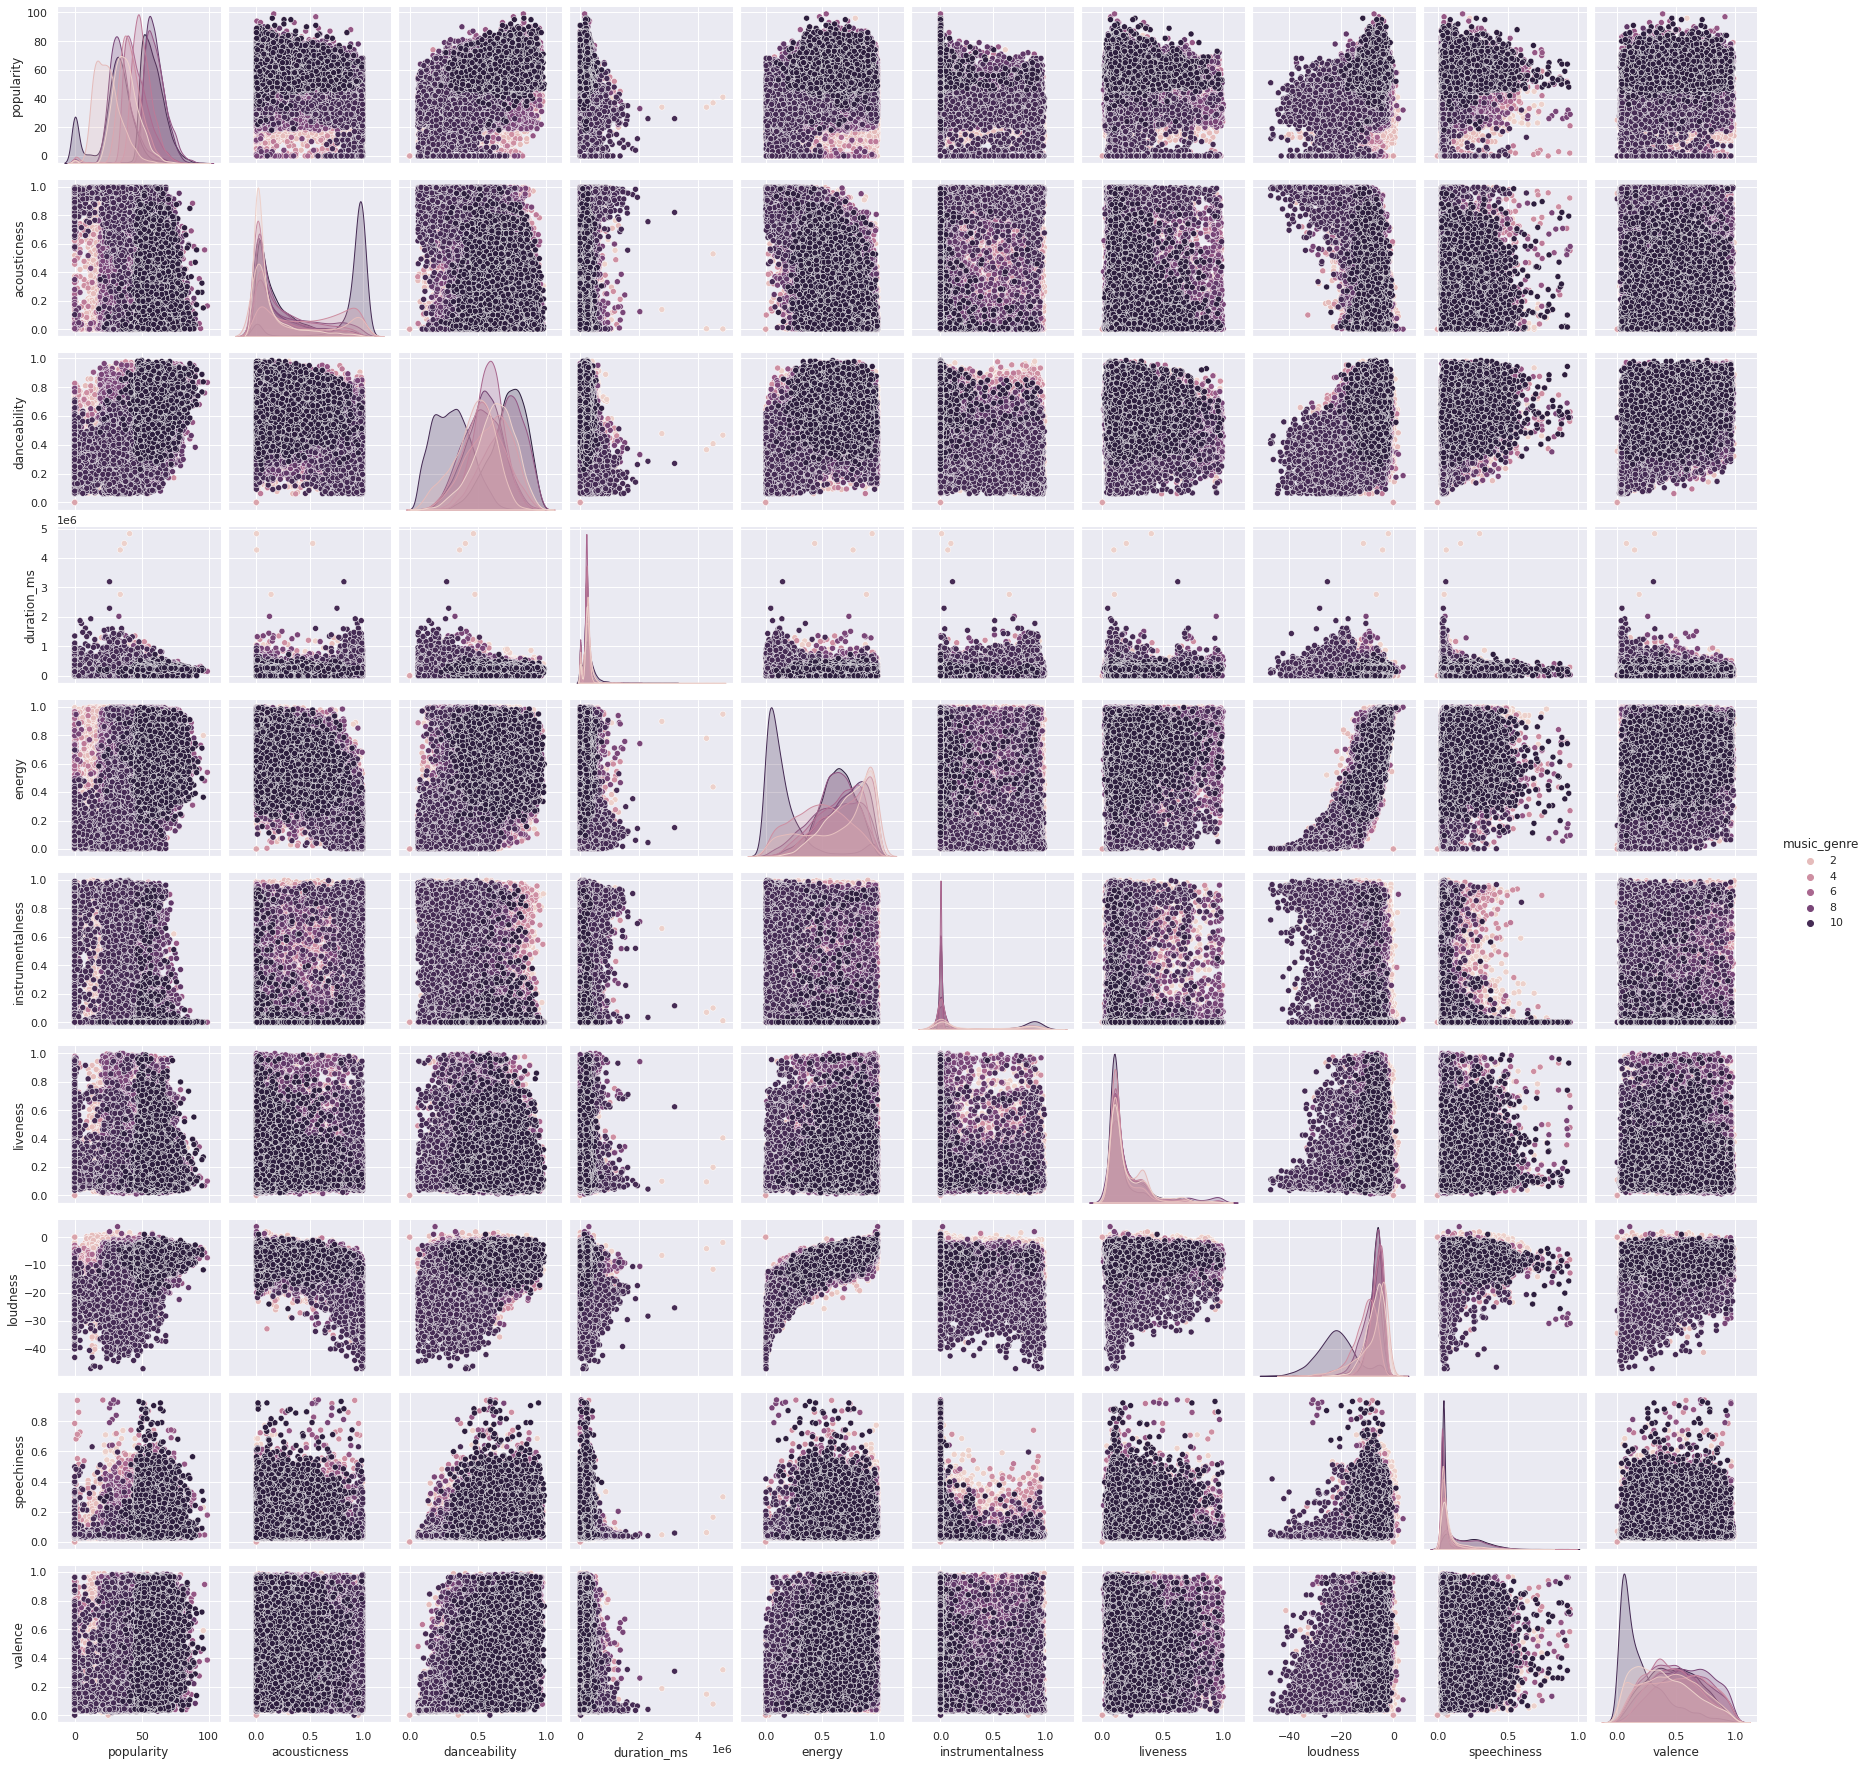

In [ ]:
sns.pairplot(data[dop], hue = 'music_genre');

ничего полезного

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


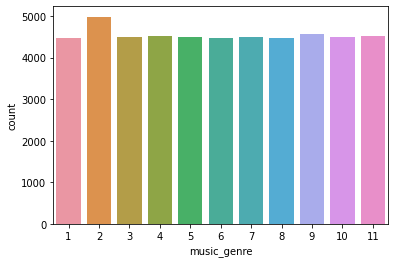

In [269]:
sns.countplot(df['music_genre']);

классы сбалансированны

In [29]:
y = df["music_genre"]
X = df.drop(columns=["music_genre"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

В задачах многоклассовой классификации используются усредненные метрики бинарной классификации.

In [27]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

In [210]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp = 0
  tn = 0
  fn = 0
  fp = 0
  num_classes = len(set(y_act))
  for i in range(num_classes):
    tp += sum((y_act == i) & (y_pred == i))
    tn += sum((y_act != i) & (y_pred != i))
    fn += sum((y_act == i) & (y_pred != i))
    fp += sum((y_act != i) & (y_pred == i))
  return tp, tn, fp, fn

In [211]:
def compute_recall(tp, fn):
	'''
	Recall = TP /FN + TP 

	'''
	return (tp  * 100)/ float( tp + fn+ 0.001)

In [212]:
def compute_precision(tp, fp):
	'''
	Precision = TP  / FP + TP 

	'''
	return (tp  * 100)/ float( tp + fp + 0.001)

In [213]:
# F1 = 2 * (precision * recall) / (precision + recall)
def compute_f1_score(y_true, y_pred): #for binary classification
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall + 0.001)
    return f1_score

In [32]:
#f1_score как сренее гармоничество precision и recall отличается свойством: 
#если одно из этих двух значений резко уменьшается, оценка f также уменьшается.
#В данной задаче нет смысла отдавать предпочтение какой-либо из этих двух, лучше учитывать их обе

#precision -  доля истинного позитива во всех положительных прогнозах. 
#Точность 1 означает, что у вас нет ложного срабатывания.

#recall -  доля истинных положительных результатов по всем фактическим положительным элементам. 
#Отзыв 1 означает, что у вас нет ложного отрицания.

In [33]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!

In [34]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [87]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    for i in np.arange(len(X)//batch_size):
        ind = perm[i * batch_size : (i + 1) * batch_size]
        yield X[ind], np.eye(11)[y[ind]]

In [226]:
def logit(x, w, b):
    return x @ w + b

def softmax(a):
  a = np.array(a)
  return np.exp(a-max(a)) / np.sum(np.exp(a-max(a)))

def softmax_grad(s): #сумма по одному из измерений
    jacobian_m = np.diag(s)
    print(s.shape)
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            print(s[i], s[i].dtype)
            if i == j:
                jacobian_m[i][j] = s[i] * (1-s[i])
            else: 
                jacobian_m[i][j] = -s[i]*s[j]
    return jacobian_m.sum(axis = 1)

class LogisticRegression(object):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef
        self.l2_coef = l2_coef
        self.w = None
        self.b = None
        self.num_classes = None
    
    def fit(self, X, y, epochs=200, lr=1e-7, batch_size=64, flag = False):
        n, k = X.shape     
        self.num_classes = 11
        self.b = np.random.random(self.num_classes)
        if self.w is None:
            np.random.seed(10)
            self.w = np.random.random((X.shape[1], self.num_classes))
        losses = []
        for i in range(epochs):
            l = []
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                predictions = self.predict(X_batch)
                l.append(self.__loss(y_batch, predictions))
                self.w -= lr * self.get_grad(X_batch, y_batch, predictions)
                self.b -= lr * np.sum(predictions-y_batch)/len(y_batch) #свой градиент
            losses.append(np.sum(l) / len(l))
            if flag:
              break
        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        logs = logit(X_batch, self.w, self.b)
        soft = []
        for log, yy in zip(logs, y_batch):
          soft.append(softmax(log) - yy)
          #print(s.shape, yy.shape)
        grad_basic = np.dot(X_batch.T, np.array(soft))

        wc = np.copy(self.w)
        grad_l2 = self.l2_coef * wc * 2
        grad_l1 = self.l1_coef * np.sign(wc)
        res = grad_basic + grad_l1 + grad_l2
        return res
        
    def predict(self, X):
        logs = logit(X, self.w, self.b)
        answer = []
        for one in range(len(logs)):
          answer.append(softmax(logs[one]))
        return answer
    
    def predict_test(self, X):
      logs = logit(X, self.w, self.b)
      answer = []
      for log in logs.values:
        answer.append(np.argmax(softmax(log))+1)
      return answer
 
    def __loss(self, y, p): #logloss
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))/len(y)


In [227]:
my_model = LogisticRegression(0.2, 0)

In [228]:
loss = my_model.fit(X_train, y_train-1)

In [229]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

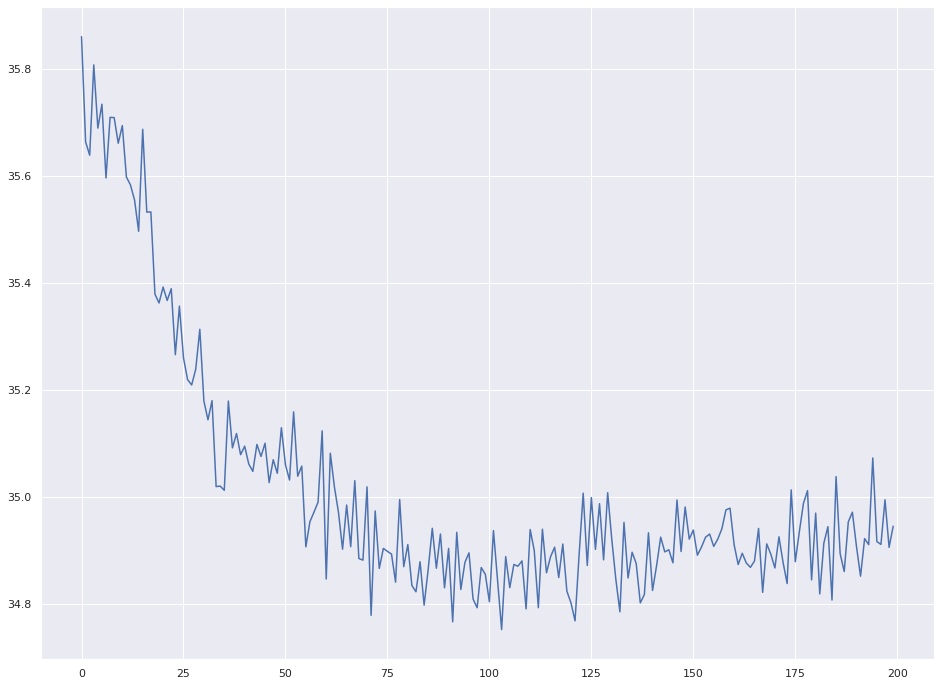

In [230]:
plt.plot(loss)

In [ ]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn

In [231]:
pred = my_model.predict_test(X_test)

In [232]:
compute_f1_score(y_test, pred)

0.0

In [233]:
pred = my_model.predict_test(X_train)

In [234]:
compute_f1_score(y_train, pred)

0.0

In [235]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [257]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [258]:
print('test', compute_f1_score(y_test, lr.predict(X_test)))
print('train', compute_f1_score(y_test, lr.predict(X_test)))

test 0.3381428076643125
train 0.3381428076643125


In [ ]:
#как видно, библиотечная тоже плохо обучилась

In [ ]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью